In [2]:
# Load the TSV file
import pandas as pd

# Load the wood densities TSV file
df = pd.read_csv('wood_densities_table.tsv', sep='\t')

# Display the first few rows
df.head()

,Nature des Bois,Densité
0,Açoita-cavallo,0.586
1,Aderno,0.934
2,Alecrim,0.943
3,Alleluia,0.567
4,Andá-assú,0.494


In [3]:
# Basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nData types and non-null values:")
df.info()
print("\nBasic statistics for numerical columns:")
df.describe()
print("\nCheck for missing values:")
print(df.isnull().sum())

Dataset shape: (74, 2)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nature des Bois  74 non-null     object 
 1   Densité          74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB

Basic statistics for numerical columns:

Check for missing values:
Nature des Bois    0
Densité            0
dtype: int64


In [6]:
# Install required packages
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.9 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.many

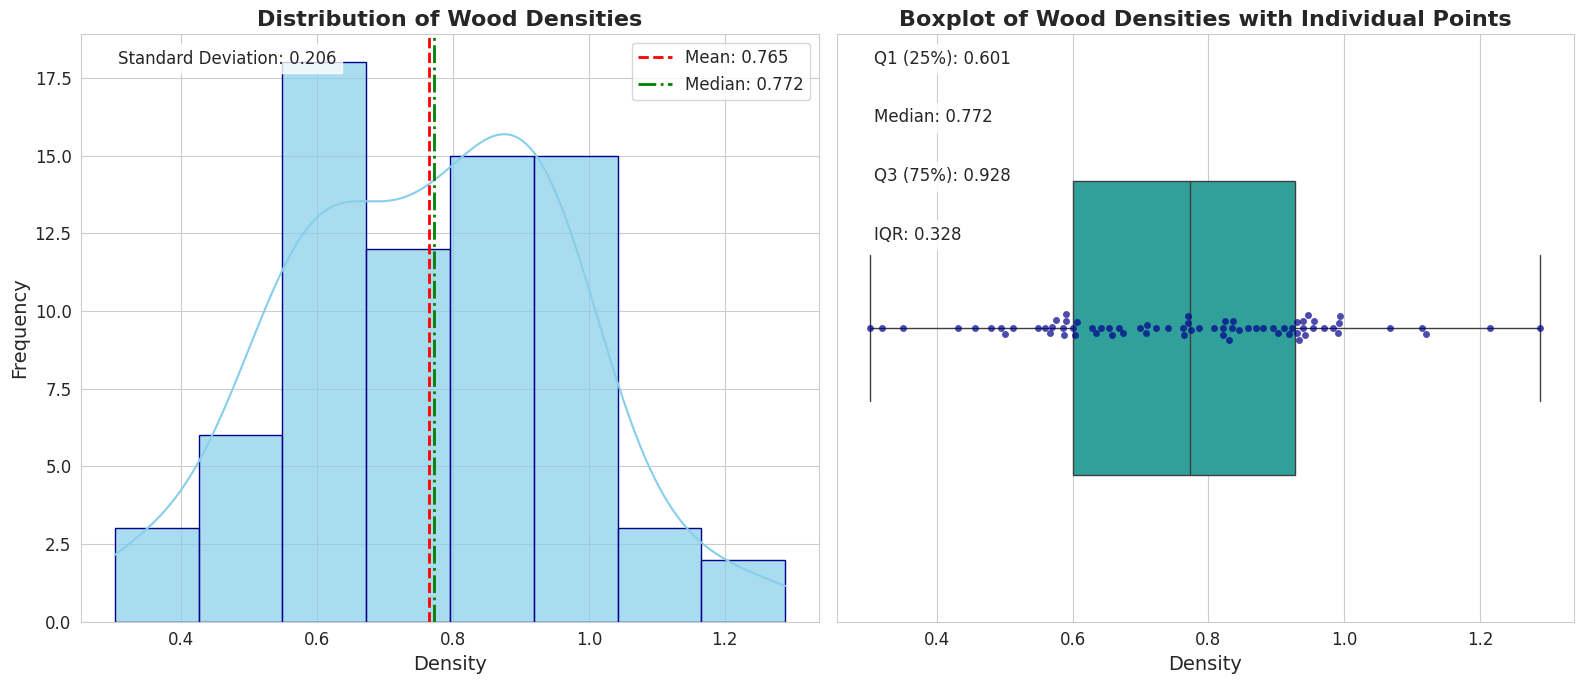

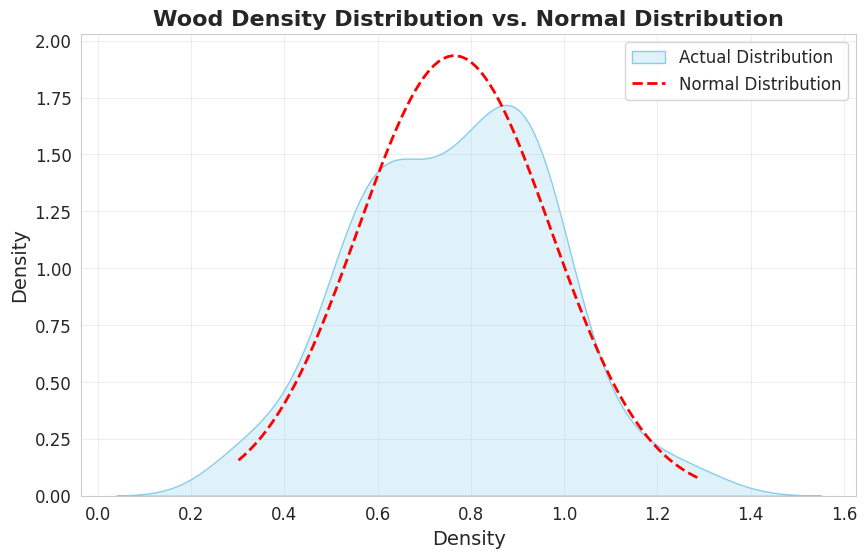

In [9]:
# Improved visualizations of wood densities
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Calculate statistics for annotations
mean_density = df['Densité'].mean()
median_density = df['Densité'].median()
std_density = df['Densité'].std()

# Plot 1: Enhanced histogram with KDE
sns.histplot(df['Densité'], kde=True, color='skyblue', 
             edgecolor='darkblue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Wood Densities', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Add vertical lines for mean and median
axes[0].axvline(mean_density, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_density:.3f}')
axes[0].axvline(median_density, color='green', linestyle='-.', linewidth=2, 
                label=f'Median: {median_density:.3f}')

# Add text annotation for standard deviation
axes[0].text(0.05, 0.95, f'Standard Deviation: {std_density:.3f}', 
             transform=axes[0].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

axes[0].legend(loc='upper right')

# Plot 2: Enhanced boxplot with individual points
sns.boxplot(x=df['Densité'], color='lightseagreen', width=0.5, ax=axes[1])
# Add swarmplot to show individual data points
sns.swarmplot(x=df['Densité'], color='darkblue', size=5, alpha=0.7, ax=axes[1])

axes[1].set_title('Boxplot of Wood Densities with Individual Points', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Density', fontsize=14)

# Add annotations for quartiles
q1, q3 = np.percentile(df['Densité'], [25, 75])
iqr = q3 - q1
axes[1].text(0.05, 0.95, f'Q1 (25%): {q1:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
axes[1].text(0.05, 0.85, f'Median: {median_density:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
axes[1].text(0.05, 0.75, f'Q3 (75%): {q3:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
axes[1].text(0.05, 0.65, f'IQR: {iqr:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Create a density plot comparing with normal distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Densité'], fill=True, color='skyblue', label='Actual Distribution')

# Generate normal distribution with same mean and std
x = np.linspace(df['Densité'].min(), df['Densité'].max(), 100)
y = np.exp(-(x - mean_density)**2 / (2 * std_density**2)) / (std_density * np.sqrt(2 * np.pi))
plt.plot(x, y, 'r--', linewidth=2, label='Normal Distribution')

plt.title('Wood Density Distribution vs. Normal Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Density', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

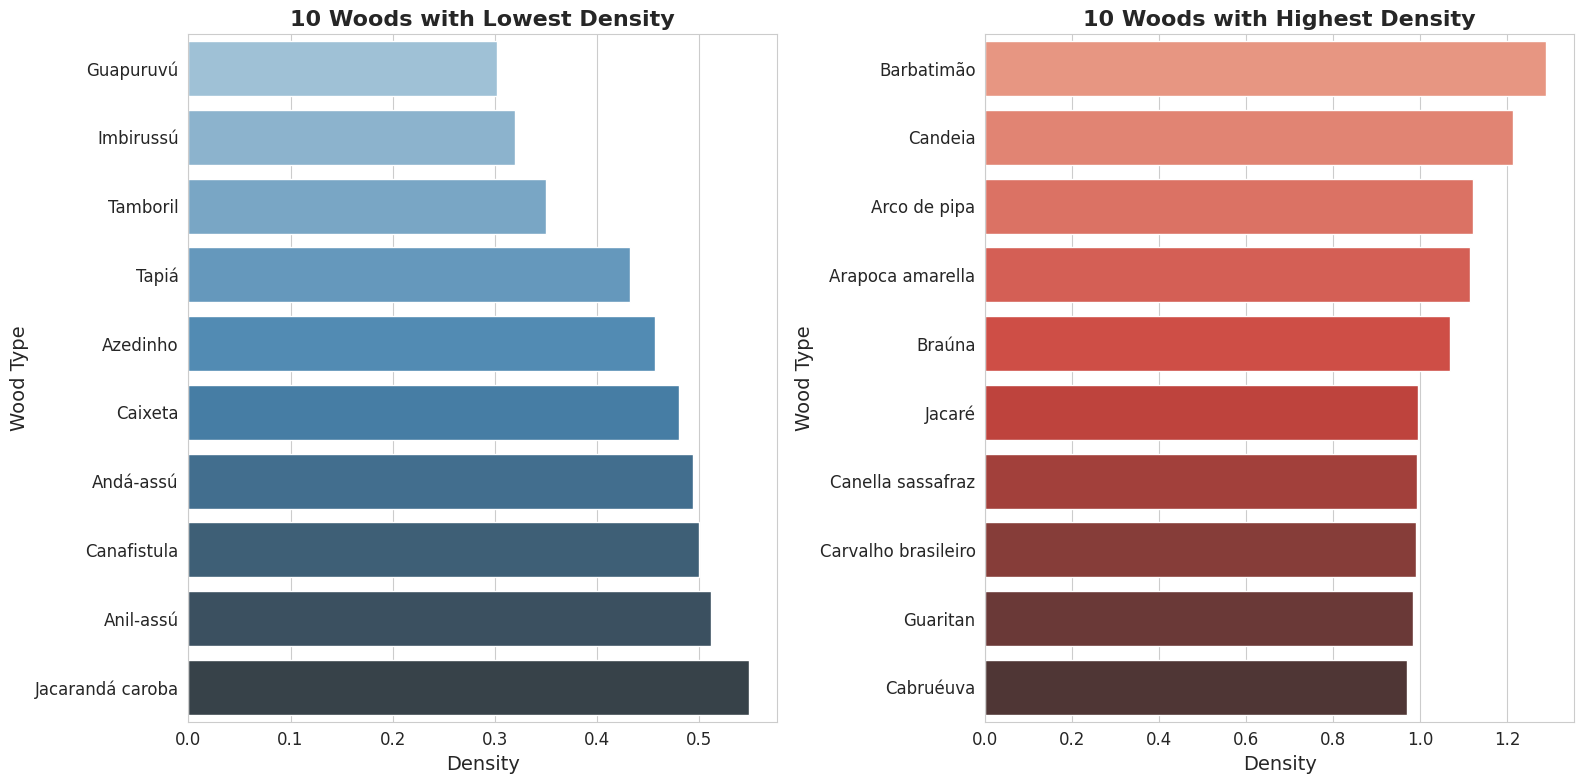

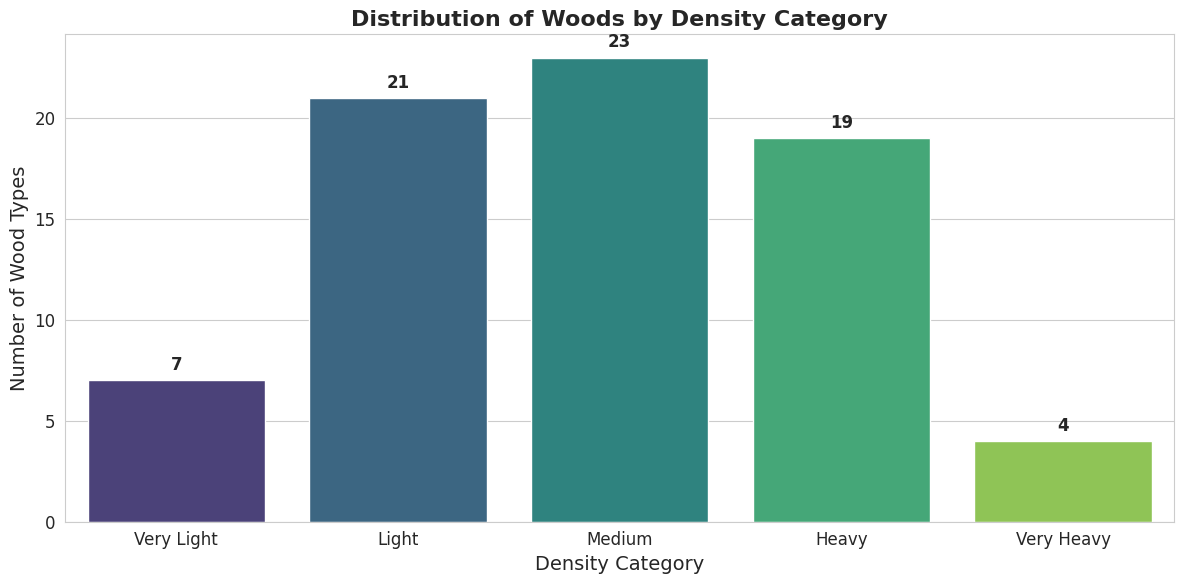

In [11]:
# Analyze the top and bottom wood types by density
# Sort the dataframe by density
df_sorted = df.sort_values(by='Densité')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the 10 woods with lowest density - fixing the FutureWarning
sns.barplot(x='Densité', y='Nature des Bois', hue='Nature des Bois', 
            data=df_sorted.head(10), palette='Blues_d', legend=False, ax=axes[0])
axes[0].set_title('10 Woods with Lowest Density', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Wood Type', fontsize=14)

# Plot the 10 woods with highest density - fixing the FutureWarning
sns.barplot(x='Densité', y='Nature des Bois', hue='Nature des Bois',
            data=df_sorted.tail(10).iloc[::-1], palette='Reds_d', legend=False, ax=axes[1])
axes[1].set_title('10 Woods with Highest Density', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Density', fontsize=14)
axes[1].set_ylabel('Wood Type', fontsize=14)

plt.tight_layout()
plt.show()

# Additional analysis - density ranges
density_ranges = [
    (0.0, 0.5, 'Very Light'),
    (0.5, 0.7, 'Light'),
    (0.7, 0.9, 'Medium'),
    (0.9, 1.1, 'Heavy'),
    (1.1, float('inf'), 'Very Heavy')
]

# Create a new column for density category
df['Density Category'] = pd.cut(
    df['Densité'], 
    bins=[r[0] for r in density_ranges] + [float('inf')],
    labels=[r[2] for r in density_ranges],
    right=False
)

# Plot the distribution of wood by density category - fixing the FutureWarning
plt.figure(figsize=(12, 6))
category_counts = df['Density Category'].value_counts().sort_index()
ax = sns.barplot(x=category_counts.index, y=category_counts.values, 
                 hue=category_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Woods by Density Category', fontsize=16, fontweight='bold')
plt.xlabel('Density Category', fontsize=14)
plt.ylabel('Number of Wood Types', fontsize=14)

# Add count labels on top of bars
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Install pygbif package to interact with the GBIF API
!pip install pygbif

  Using cached requests_cache-1.2.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl.metadata (3.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.6 MB/s eta 0:00:00
Using cached requests_cache-1.2.1-py3-none-any.whl (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00
Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)


In [13]:
# Use the GBIF API to infer taxon IDs from Portuguese common names
from pygbif import species
import time

# Create a function to search for taxon IDs
def get_taxon_id(common_name):
    try:
        # Search for the species using the common name
        search_results = species.name_suggest(q=common_name, limit=5)
        
        if search_results and len(search_results) > 0:
            # Return the first match's key and scientific name
            return {
                'taxon_key': search_results[0].get('key', None),
                'scientific_name': search_results[0].get('scientificName', None),
                'rank': search_results[0].get('rank', None),
                'status': search_results[0].get('status', None)
            }
        else:
            return {'taxon_key': None, 'scientific_name': None, 'rank': None, 'status': None}
    except Exception as e:
        print(f"Error searching for {common_name}: {e}")
        return {'taxon_key': None, 'scientific_name': None, 'rank': None, 'status': None}

# Create a copy of the dataframe to store the results
df_with_taxon = df.copy()

# Add columns for the taxon information
df_with_taxon['taxon_key'] = None
df_with_taxon['scientific_name'] = None
df_with_taxon['rank'] = None
df_with_taxon['status'] = None

# Process each wood name and add a small delay to avoid rate limiting
for idx, row in df_with_taxon.iterrows():
    wood_name = row['Nature des Bois']
    print(f"Searching for: {wood_name}")
    
    # Get taxon information
    taxon_info = get_taxon_id(wood_name)
    
    # Update the dataframe
    df_with_taxon.at[idx, 'taxon_key'] = taxon_info['taxon_key']
    df_with_taxon.at[idx, 'scientific_name'] = taxon_info['scientific_name']
    df_with_taxon.at[idx, 'rank'] = taxon_info['rank']
    df_with_taxon.at[idx, 'status'] = taxon_info['status']
    
    # Add a small delay to avoid rate limiting
    time.sleep(0.5)

# Display the results
print("\nResults:")
print(f"Total wood types: {len(df_with_taxon)}")
print(f"Found taxon IDs: {df_with_taxon['taxon_key'].notna().sum()}")
print(f"Missing taxon IDs: {df_with_taxon['taxon_key'].isna().sum()}")

# Display the first few rows with taxon information
df_with_taxon.head(10)

Searching for: Açoita-cavallo
Searching for: Aderno
Searching for: Alecrim
Searching for: Alleluia
Searching for: Andá-assú
Searching for: Angelim
Searching for: Angelim doce
Searching for: Anil-assú
Searching for: Arapoca amarella
Searching for: Arapoca branca
Searching for: Araribá amarelho
Searching for: Araribá vermelho
Searching for: Arco de pipa
Searching for: Ataiúba
Searching for: Azedinho
Searching for: Batalha
Searching for: Barbatimão
Searching for: Bico de pato
Searching for: Bicuhyba
Searching for: Branquilho
Searching for: Braúna
Searching for: Cabruéuva
Searching for: Cafezinho
Searching for: Caingá
Searching for: Caixeta
Searching for: Cambará
Searching for: Cambotaan
Searching for: Canafistula
Searching for: Candeia
Searching for: Canella amarella
Searching for: Canella póca
Searching for: Canella preta
Searching for: Canella sassafraz
Searching for: Cangerana
Searching for: Carvalho brasileiro
Searching for: Caviúna
Searching for: Cedro branco
Searching for: Cedro ros

,Nature des Bois,Densité,Density Category,taxon_key,scientific_name,rank,status
0,Açoita-cavallo,0.586,Light,4799541,"Oryctodiplax Cavallo & Galletti, 1987",GENUS,ACCEPTED
1,Aderno,0.934,Heavy,None,None,None,None
2,Alecrim,0.943,Heavy,9919265,"Belostoma nessimiani Ribeiro & Alecrim, 2008",SPECIES,ACCEPTED
3,Alleluia,0.567,Light,3129784,Baccharis alleluia A.S.Oliveira & Deble,SPECIES,ACCEPTED
4,Andá-assú,0.494,Very Light,None,None,None,None
5,Angelim,0.723,Medium,10482910,"Paracymbiomma angelim Rodrigues, Cizauskas & R...",SPECIES,ACCEPTED
6,Angelim doce,0.923,Heavy,None,None,None,None
7,Anil-assú,0.512,Light,4742021,"Anillopsidius Coiffait, 1969",GENUS,ACCEPTED
8,Arapoca amarella,1.115,Very Heavy,None,None,None,None
9,Arapoca branca,0.764,Medium,None,None,None,None


Number of species with valid scientific names: 18

Scientific names found:
- Oryctodiplax Cavallo & Galletti, 1987
- Belostoma nessimiani Ribeiro & Alecrim, 2008
- Baccharis alleluia A.S.Oliveira & Deble
- Paracymbiomma angelim Rodrigues, Cizauskas & Rheims, 2018
- Anillopsidius Coiffait, 1969
- Scotomyias Ohlson, Irestedt, Batalha Filho, Ericson & Fjeldså, 2020
- Virola bicuhyba (Schott ex Spreng.) Warb.
- Timiriasevia sanfranciscanensis Leite, Do Carmo, Ress, Pessoa, Caixeta, Denezine, Adorno & Antonietto, 2018
- Telimena canafistulae (F.Stevens & Dalbey) Mardones, Trampe & M.Piepenbr.
- Discorbis candeiana var. candeiana
- Cabralea cangerana Saldanha
- Rosa cedrorum Gand.
- Mirimiri Helgan, 2005
- Plesiopharos Puértolas-Pascual, Marx, Mateus, Saleiro, Fernandes, Marinheiro, Tomás & Mateus, 2021
- Pinheirodon Hahn & Hahn, 1999
- Enterolobium tamboril Mart.
- Tarumania de Pinna, 2017
- Tayuva Er.Marcus & Ev.Marcus, 1967

Getting Open Tree of Life IDs...
Error getting OTT ID for Orycto

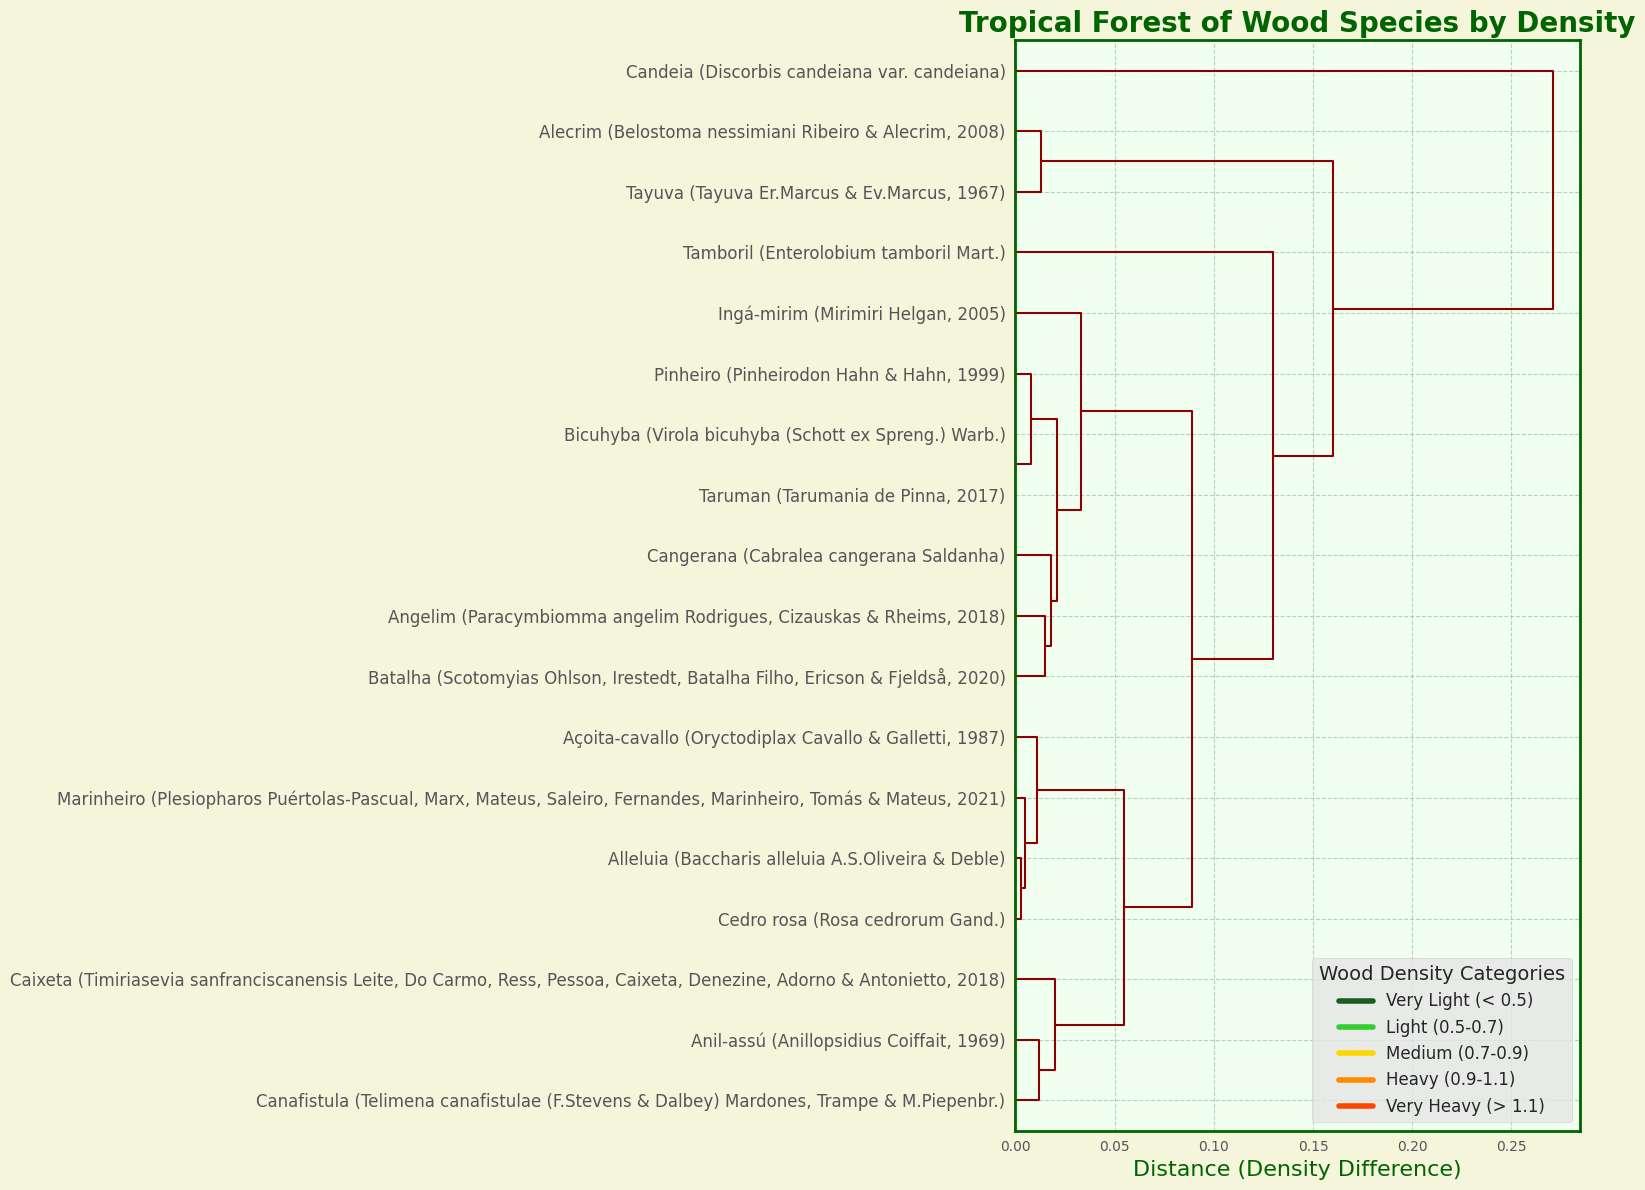


Tropical-themed dendrogram created based on wood density values


In [15]:
# Create a phylogenetic tree for the identified wood species
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import requests
import re
import time
import matplotlib.colors as mcolors

# First, let's filter out rows with valid scientific names
valid_species = df_with_taxon[df_with_taxon['scientific_name'].notna()]
print(f"Number of species with valid scientific names: {len(valid_species)}")

# Display the scientific names
print("\nScientific names found:")
for name in valid_species['scientific_name'].unique():
    print(f"- {name}")

# We'll use the Open Tree of Life API to get phylogenetic relationships
# First, let's install the required package
try:
    import opentree
except ImportError:
    print("Installing opentree package...")
    !pip install opentree
    import opentree

# Function to get the Open Tree of Life ID for a scientific name
def get_ott_id(scientific_name):
    try:
        # Clean the name to remove any author information
        clean_name = re.sub(r'\s+\(.*?\)', '', scientific_name)
        clean_name = re.sub(r'\s+[A-Z][a-z]*\.?\s+[a-z-]+', '', clean_name)
        
        # Query the Open Tree of Life API
        response = opentree.tnrs.match_names([clean_name])
        
        # Check if we got a match
        if response and 'results' in response and response['results']:
            matches = response['results'][0]['matches']
            if matches:
                return matches[0]['taxon']['ott_id']
        return None
    except Exception as e:
        print(f"Error getting OTT ID for {scientific_name}: {e}")
        return None

# Get OTT IDs for each valid scientific name
print("\nGetting Open Tree of Life IDs...")
ott_ids = []
valid_names = []

for name in valid_species['scientific_name'].unique():
    ott_id = get_ott_id(name)
    if ott_id:
        ott_ids.append(ott_id)
        valid_names.append(name)
        print(f"Found OTT ID for {name}: {ott_id}")
    else:
        print(f"No OTT ID found for {name}")
    time.sleep(0.5)  # Add delay to avoid rate limiting

print(f"\nFound OTT IDs for {len(ott_ids)} species")

# If we have at least 2 species with OTT IDs, we can create a tree
if len(ott_ids) >= 2:
    try:
        # Get the induced subtree from Open Tree of Life
        print("\nGenerating phylogenetic tree...")
        tree_response = opentree.synthesis.induced_subtree(ott_ids=ott_ids)
        
        # Check if we got a valid tree
        if tree_response and 'newick' in tree_response:
            newick_tree = tree_response['newick']
            
            # Install and import libraries for tree visualization
            try:
                import ete3
            except ImportError:
                print("Installing ete3 package...")
                !pip install ete3
                import ete3
            
            # Create a temporary file for the tree
            with open('temp_tree.nwk', 'w') as f:
                f.write(newick_tree)
            
            # Load the tree using ETE3
            tree = ete3.Tree('temp_tree.nwk', format=1)
            
            # Replace OTT IDs with scientific names in the tree
            for leaf in tree.iter_leaves():
                ott_id = leaf.name.split('_')[-1]
                for i, oid in enumerate(ott_ids):
                    if str(oid) == ott_id:
                        leaf.name = valid_names[i]
                        break
            
            # Render the tree
            print("\nRendering phylogenetic tree...")
            tree_style = ete3.TreeStyle()
            tree_style.show_leaf_name = True
            tree_style.scale = 20
            tree_style.branch_vertical_margin = 10
            tree_style.title.add_face(ete3.TextFace("Phylogenetic Tree of Wood Species", fsize=20), column=0)
            
            # Save the tree as an image
            tree.render("wood_species_tree.png", tree_style=tree_style)
            
            # Display the tree in the notebook
            from IPython.display import Image
            display(Image("wood_species_tree.png"))
            
            print("\nPhylogenetic tree created successfully!")
        else:
            print("Failed to generate tree from Open Tree of Life API")
    except Exception as e:
        print(f"Error creating phylogenetic tree: {e}")
else:
    print("\nNot enough species with valid OTT IDs to create a phylogenetic tree")
    
    # Alternative: Create a simple dendrogram based on density values
    print("\nCreating a dendrogram based on wood density values instead...")
    
    from scipy.cluster.hierarchy import dendrogram, linkage
    from matplotlib import pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap
    
    # Prepare data for clustering
    species_data = valid_species[['Nature des Bois', 'Densité', 'scientific_name']].dropna(subset=['scientific_name'])
    
    if len(species_data) >= 2:
        # Create a matrix of density values for clustering
        density_matrix = species_data['Densité'].values.reshape(-1, 1)
        
        # Perform hierarchical clustering
        linked = linkage(density_matrix, 'single')
        
        # Create labels for the dendrogram
        labels = [f"{row['Nature des Bois']} ({row['scientific_name']})" 
                 if isinstance(row['scientific_name'], str) else row['Nature des Bois'] 
                 for _, row in species_data.iterrows()]
        
        # Set a tropical-themed style
        plt.style.use('ggplot')
        
        # Create a custom tropical colormap
        tropical_colors = [
            '#1A5E1F',  # Dark green (forest)
            '#32CD32',  # Lime green
            '#FFD700',  # Gold
            '#FF8C00',  # Dark orange
            '#FF4500',  # Orange red
            '#8B0000'   # Dark red
        ]
        tropical_cmap = LinearSegmentedColormap.from_list('tropical', tropical_colors)
        
        # Plot the dendrogram with tropical colors
        plt.figure(figsize=(16, 12), facecolor='#F5F5DC')  # Light beige background
        
        # Create the dendrogram with tropical colors
        dend = dendrogram(
            linked,
            orientation='right',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=12,
            color_threshold=0.05,  # This will create color groupings
            above_threshold_color='#1A5E1F',  # Dark green for higher branches
            link_color_func=lambda x: tropical_colors[min(int(x*10), len(tropical_colors)-1)]
        )
        
        # Customize the plot
        plt.title('Tropical Forest of Wood Species by Density', fontsize=20, fontweight='bold', color='#006400')
        plt.xlabel('Distance (Density Difference)', fontsize=16, color='#006400')
        
        # Add a decorative border
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_edgecolor('#006400')
            spine.set_linewidth(2)
        
        # Add a subtle grid
        ax.grid(True, linestyle='--', alpha=0.6, color='#8FBC8F')
        
        # Add a background image-like effect
        ax.set_facecolor('#F0FFF0')  # Honeydew color
        
        # Add a legend for density categories
        from matplotlib.lines import Line2D
        
        density_categories = [
            ('Very Light (< 0.5)', '#1A5E1F'),
            ('Light (0.5-0.7)', '#32CD32'),
            ('Medium (0.7-0.9)', '#FFD700'),
            ('Heavy (0.9-1.1)', '#FF8C00'),
            ('Very Heavy (> 1.1)', '#FF4500')
        ]
        
        legend_elements = [Line2D([0], [0], color=color, lw=4, label=label)
                          for label, color in density_categories]
        
        plt.legend(handles=legend_elements, loc='lower right', 
                  title='Wood Density Categories', fontsize=12, title_fontsize=14)
        
        plt.tight_layout()
        plt.show()
        
        print("\nTropical-themed dendrogram created based on wood density values")
    else:
        print("Not enough valid species data to create a dendrogram")